<a href="https://colab.research.google.com/github/SABBiR1107/AI-Assistant-Usage-in-Student-Life-Data-Analysis/blob/main/AI_Assistant_Usage_in_Student_Life_%E2%80%94_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('/content/ai_assistant_usage_student_life.csv')
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [ ]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [ ]:
df.isnull().sum()

,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


# Data Cleaning

In [ ]:
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df['StudentLevel'] = df['StudentLevel'].astype('category')
df['Discipline'] = df['Discipline'].astype('category')
df['TaskType'] = df['TaskType'].astype('category')
df['FinalOutcome'] = df['FinalOutcome'].astype('category')

# Exploratory Data Analysis (EDA)

**Summary Statistics**

In [ ]:
df.describe(include='all')

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000,10000,10000.000000
unique,10000,3,7,NaN,NaN,NaN,6,NaN,4,2,NaN
top,SESSION09984,Undergraduate,Biology,NaN,NaN,NaN,Writing,NaN,Assignment Completed,True,NaN
freq,1,5978,1458,NaN,NaN,NaN,3101,NaN,4768,7064,NaN
mean,NaN,NaN,NaN,2024-12-23 09:05:36.960000,19.846467,5.607500,NaN,3.479500,NaN,NaN,3.417780
min,NaN,NaN,NaN,2024-06-24 00:00:00,0.030000,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2024-09-20 00:00:00,9.630000,2.000000,NaN,3.000000,NaN,NaN,2.600000
50%,NaN,NaN,NaN,2024-12-25 00:00:00,16.650000,4.000000,NaN,4.000000,NaN,NaN,3.500000
75%,NaN,NaN,NaN,2025-03-27 00:00:00,26.670000,8.000000,NaN,4.000000,NaN,NaN,4.400000
max,NaN,NaN,NaN,2025-06-24 00:00:00,110.810000,39.000000,NaN,5.000000,NaN,NaN,5.000000


array([[<Axes: title={'center': 'SessionLengthMin'}>,
        <Axes: title={'center': 'TotalPrompts'}>],
       [<Axes: title={'center': 'AI_AssistanceLevel'}>,
        <Axes: title={'center': 'SatisfactionRating'}>]], dtype=object)

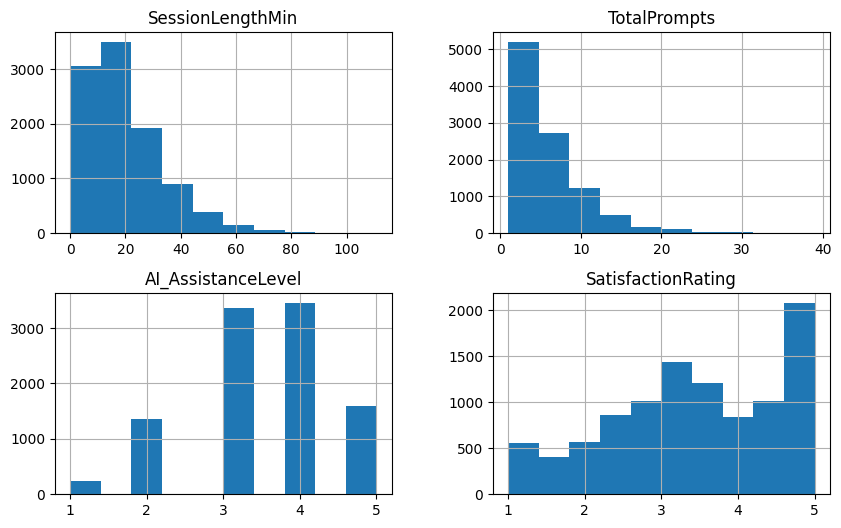

In [ ]:
df[['SessionLengthMin','TotalPrompts','AI_AssistanceLevel','SatisfactionRating']].hist(figsize=(10,6))

**Session Length Min:** Right skewed and most session are short under 25 minutes but few much longer up to 100+.

**Total Prompts:** Strongly right skewes and most session have few prompts(1-5) but a small number go above 20.


**Ai Assistance Level:** Multimodal and noticable peaks at 3 and 4. Many session use medium to high ai assistance levels.

Text(0.5, 1.0, 'Distribution of Student Levels')

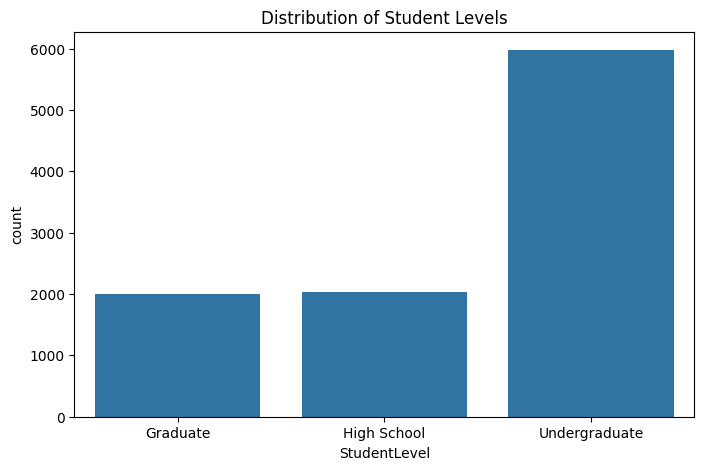

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='StudentLevel', data=df)
plt.title("Distribution of Student Levels")


Most to the Undergraduarte students ai assistant usage studentLife

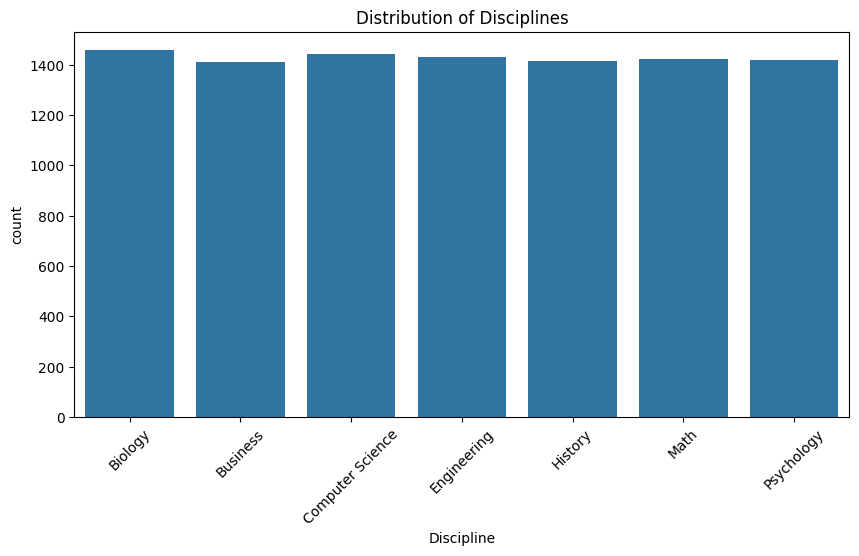

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Discipline', data=df)
plt.title("Distribution of Disciplines")
plt.xticks(rotation=45)
plt.show()

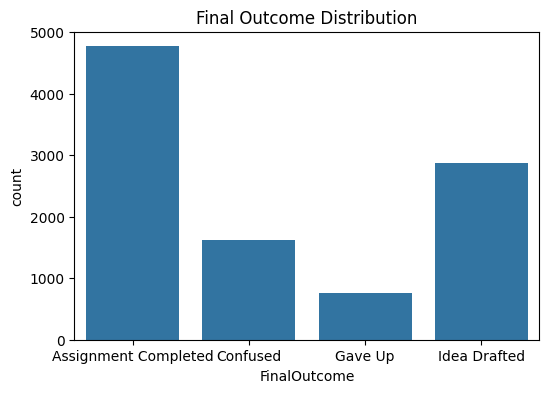

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='FinalOutcome', data=df)
plt.title("Final Outcome Distribution")
plt.show()

# **Bivariate Analysis**



*  Relationships Between Variables



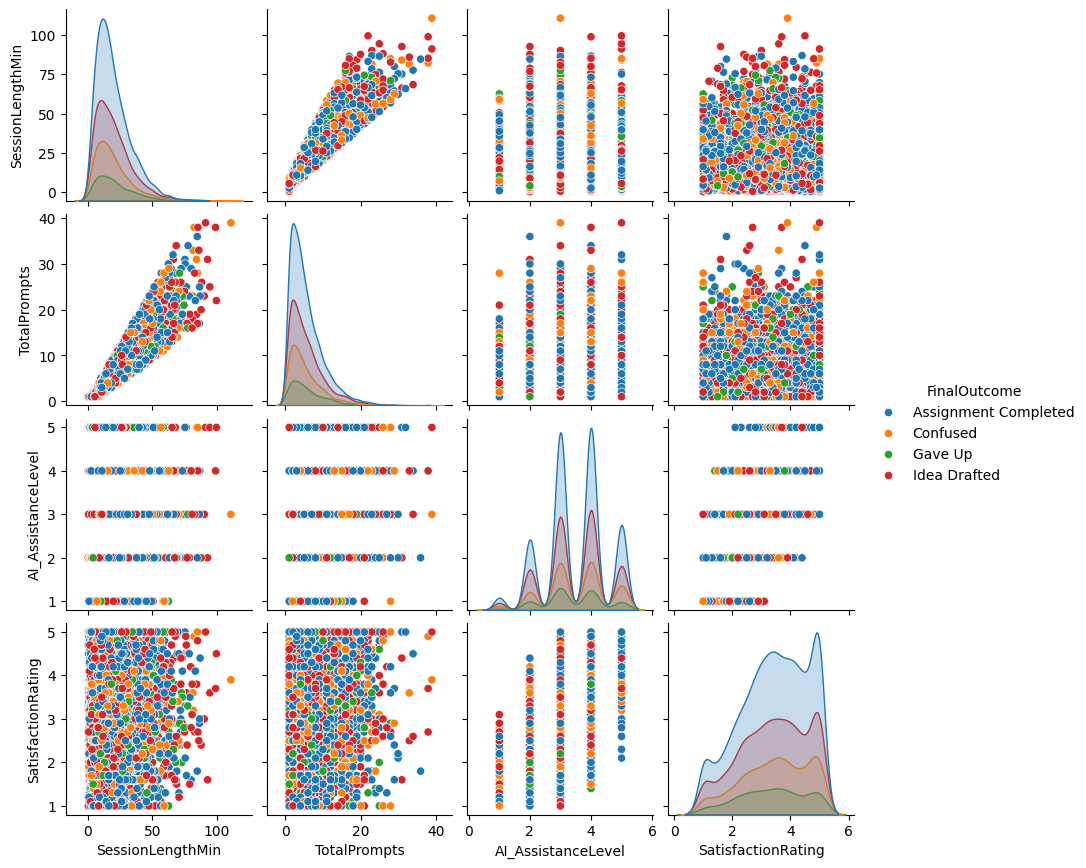

In [31]:
sns.pairplot(df, vars=['SessionLengthMin','TotalPrompts','AI_AssistanceLevel','SatisfactionRating'], hue='FinalOutcome', height=2.2)

| Variable Relationship                   | Pattern                          | Key Takeaway                                                |
| --------------------------------------- | -------------------------------- | ----------------------------------------------------------- |
| SessionLengthMin ↔ TotalPrompts         | Strong positive                  | More time → more prompts → better outcomes                  |
| AI_AssistanceLevel ↔ SatisfactionRating | Moderate positive (peaks at 3–4) | Medium AI help gives best experience                        |
| SessionLengthMin ↔ SatisfactionRating   | Weak–moderate                    | Longer sessions correlate with higher satisfaction          |
| FinalOutcome (color)                    | Blue dominates high ranges       | Successful sessions have higher satisfaction and engagement |


**Student level vs Satisfaction**

<Axes: xlabel='StudentLevel', ylabel='SatisfactionRating'>

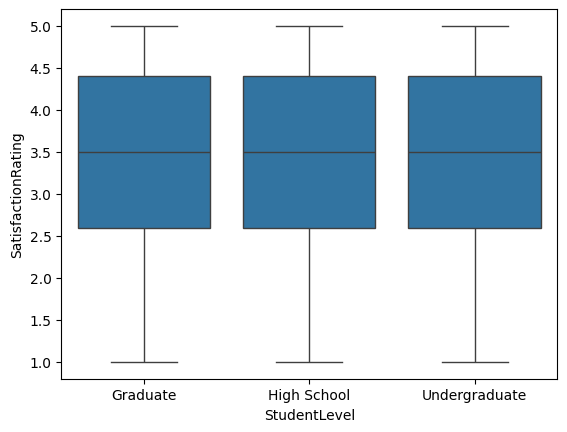

In [23]:
sns.boxplot(x='StudentLevel', y='SatisfactionRating', data=df)

All kinds of students Satisfcation Rating are almost same 3.0 - 4.4

**AI Assistance vs Final Outcome**

<Axes: xlabel='AI_AssistanceLevel', ylabel='SatisfactionRating'>

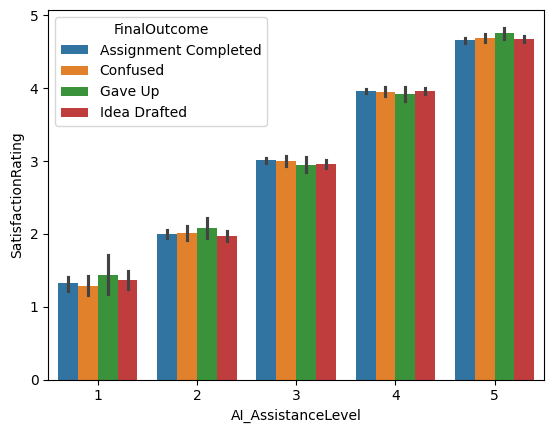

In [24]:
sns.barplot(x='AI_AssistanceLevel', y='SatisfactionRating', hue='FinalOutcome', data=df)

SatisfactionRating increases steadily as AI_AssistanceLevel goes from 1 → 5.

This trend holds true regardless of FinalOutcome (Assignment Completed, Confused, Gave Up, Idea Drafted).

The difference between outcomes is minimal — all follow a similar upward pattern.

**Correlation Heatmap**

<Axes: >

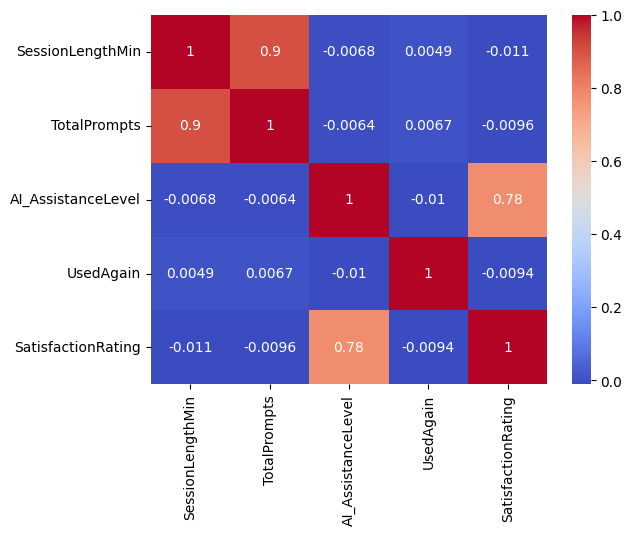

In [25]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In the correlation showes that, SessionLengthMin and TotalPrompts are very high positive correlation (0.90)

AiAssistanceLevel and SatisfactionRating are storngly positive correlation (.78)

# **Time Series Trends**

**Monthly Trends**

<Axes: xlabel='SessionDate'>

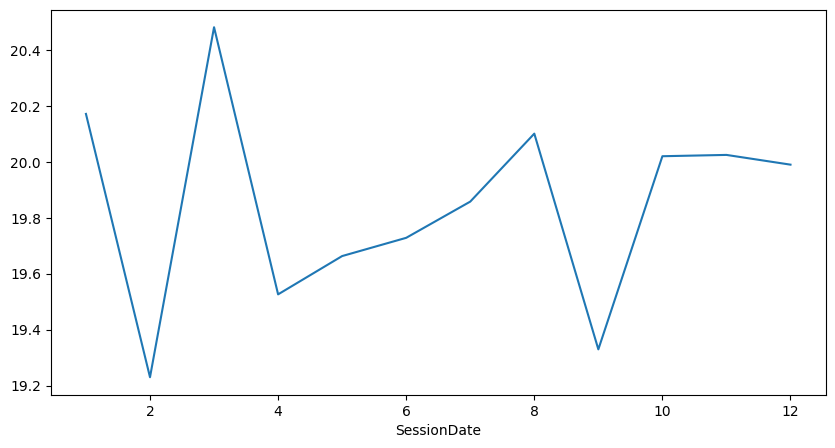

In [26]:
df.groupby(df['SessionDate'].dt.month)['SessionLengthMin'].mean().plot(kind='line', figsize=(10,5))

Average session length fluctuates month-to-month (or week-to-week), but remains fairly stable around ~20 minutes.

A few noticeable spikes and dips, suggesting varying engagement over time.

**Daily Trends**

<Axes: xlabel='DayOfWeek', ylabel='SatisfactionRating'>

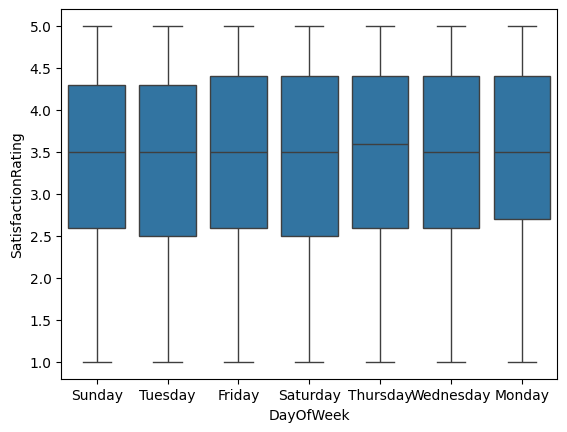

In [27]:
df['DayOfWeek'] = df['SessionDate'].dt.day_name()
sns.boxplot(x='DayOfWeek', y='SatisfactionRating', data=df)

Ratings range roughly from 1 to 5 across all days.

Median satisfaction stays around 3.5–3.6 every day — indicating consistent user experience throughout the week.

# 🧾 Project Information

**Project Title:**
AI Assistant Usage in Student Life — Data Analysis

**Completed by:**
Md. Ahsanur Rahman
Department of Computer Science and Engineering
Daffodil International University

**Dataset Source:**
Kaggle — AI Assistant Usage in Student Life (Synthetic)

Dataset created by ***Ayesha Salahuddin***